# re_LAISS

In [1]:
import os
import numpy as np
import pandas as pd
import sys
import os
import corner
import matplotlib.pyplot as plt
import logging
from statsmodels import robust

import warnings
warnings.filterwarnings("ignore")

working_dir = os.path.abspath("")
os.chdir(working_dir)
sys.path.append('../code/')

import constants
from mod_helper_functions import *
from mod_laiss_functions import *

## Build dataset bank

In [ ]:
# Add A_V to large dataset bank

# from sfdmap2 import sfdmap

# df = pd.read_csv("../data/large_df_bank.csv")
# m = sfdmap.SFDMap('../data/sfddata-master')
# RV = 3.1
# ebv = m.ebv(df['ra'].values, df['dec'].values)
# df['A_V'] = RV * ebv
# df.to_csv("../data/large_df_bank_wAV.csv", index=False)

In [ ]:
# Join new lightcurve features to small dataset bank

# df_large = pd.read_csv("../data/large_df_bank_wAV.csv")
# df_small = pd.read_csv("../data/small_df_bank_re_laiss.csv")

# key = 'ztf_object_id'
# extra_features = [col for col in df_large.columns if col not in df_small.columns]

# merged_df = df_small.merge(df_large[[key] + extra_features], on=key, how='left')

# lc_feature_names = constants.lc_features_const.copy()
# host_feature_names = constants.host_features_const.copy()

# small_final_df = merged_df.replace([np.inf, -np.inf, -999], np.nan).dropna(subset=lc_feature_names + host_feature_names)

# small_final_df.to_csv("../data/small_hydrated_df_bank_re_laiss.csv", index=False)

In [ ]:
# lc_feature_names = constants.lc_features_const.copy()
# host_feature_names = constants.host_features_const.copy()
# raw_host_feature_names = constants.raw_host_features_const.copy()

# raw_dataset_bank = pd.read_csv('../data/large_df_bank_wAV.csv')
# print("Shape of raw dataset bank:", raw_dataset_bank.shape)

# # Impute missing values
# from sklearn.impute import KNNImputer
# X = raw_dataset_bank[lc_feature_names+raw_host_feature_names]
# feat_imputer = KNNImputer(weights='distance').fit(X)
# imputed_filt_arr = feat_imputer.transform(X)

# imputed_df = pd.DataFrame(imputed_filt_arr, columns=lc_feature_names + raw_host_feature_names)
# imputed_df.index = raw_dataset_bank.index
# raw_dataset_bank[lc_feature_names + raw_host_feature_names] = imputed_df

# imputed__df_bank = raw_dataset_bank
# print("Shape of imputed dataset bank:", imputed__df_bank.shape)

# # Build final dataset bank
# dataset_bank = re_build_dataset_bank(raw_df_bank=imputed__df_bank, av_in_raw_df_bank=True, path_to_sfd_folder="../data/sfddata-master", building_entire_df_bank=True)
# final_dataset_bank = dataset_bank.replace([np.inf, -np.inf, -999], np.nan).dropna(subset=lc_feature_names + host_feature_names)

# # Write dataset bank to .csv
# print("Shape of final dataset bank:", final_dataset_bank.shape)
# final_dataset_bank.to_csv('../data/large_final_df_bank_new_lc_feats.csv', index=False)
# print("Successfully saved dataset bank!")

## Run re_LAISS

Building new ANNOY index with 22097 transients...
Done!

ZTF18acbwenp is not in dataset_bank.
Timeseries dataframe does not exist. Re-extracting lightcurve and host features for ZTF18acbwenp.
Extracted lightcurve features for ZTF18acbwenp in 4.78s!
Searching for host galaxy...
Host galaxy identified for ZTF18acbwenp: http://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos=151.9547965+39.73817089&filter=color
There are 131 of 131 rows in the timeseries dataframe with 1 or more NA features.
The following 2 feature(s) are NaN for all measurements: ['r_rise_local_curvature', 'r_decline_local_curvature'].
Imputing features (if necessary)...
Successfully imputed features.
Engineering features for band g...
Engineering features for band r...
Engineering features for band i...
Engineering features for band z...
Running AD Model:

Rebuilding timeseries dataframes for AD...
Extracted lightcurve features for ZTF18acbwenp in 4.40s!
Searching for host galaxy...
Host identified.

Engineering features...
F

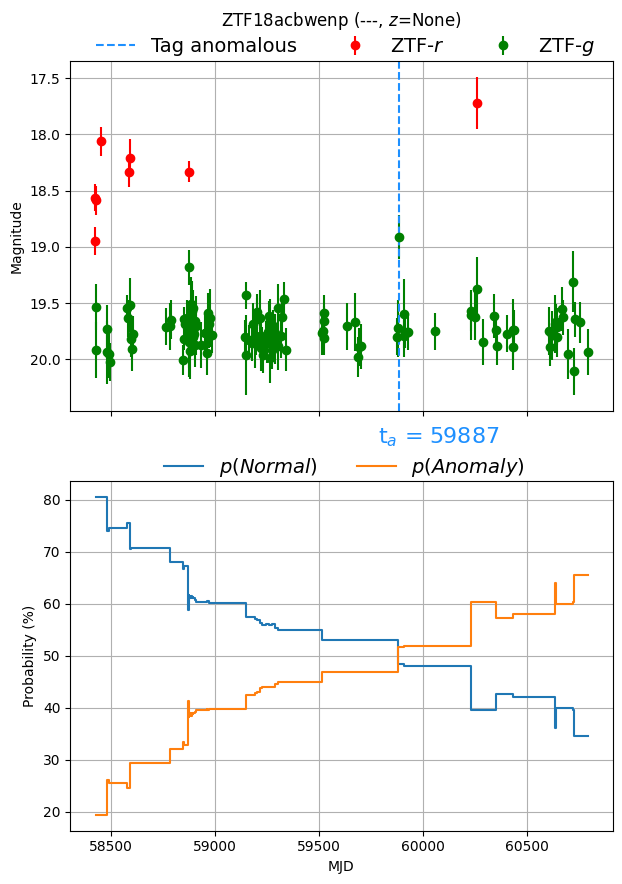

In [5]:
lc_feature_names = constants.lc_features_const.copy()
host_feature_names = constants.host_features_const.copy()

# ZTF21aaublej is Ia, ZTF18acaqdaa is TDE
# ZTF19aanovps
queried_ztf_id = 'ZTF18acbwenp'

# theorized_lc_path = 'data/theorized_lc/slsnI.csv'
# theorized_lightcurve_df = pd.read_csv('../' + theorized_lc_path)

neighbors_df, primer_dict = re_LAISS(
    transient_ztf_id=queried_ztf_id,
    # theorized_lightcurve_df=theorized_lightcurve_df,
    host_ztf_id_to_swap_in=None,
    path_to_dataset_bank='../data/large_final_df_bank_new_lc_feats.csv',
    path_to_timeseries_folder = '../timeseries',
    save_timeseries=False,
    host_feature_names=host_feature_names,
    lc_feature_names=lc_feature_names,
    path_to_sfd_data_folder="../data/sfddata-master",
    use_pca=False,
    num_pca_components=None,
    force_recreation_of_annoy_index=True,
    index_folder_relative_path="../data/re_LAISS/index_files",
    neighbors=9,
    num_mc_simulations=20,
    suggest_neighbor_num=False,
    max_neighbor_distance=None,
    search_k=5000,
    upweight_lc_feats_factor=1.5,
    run_AD=True,
    run_NN=False,
)

## re_LAISS corner plots for performance analysis

Total number of transients for corner plots: 22097
Creating corner plot for lc1...
Total number of transients for corner plot after outlier removal: 20118


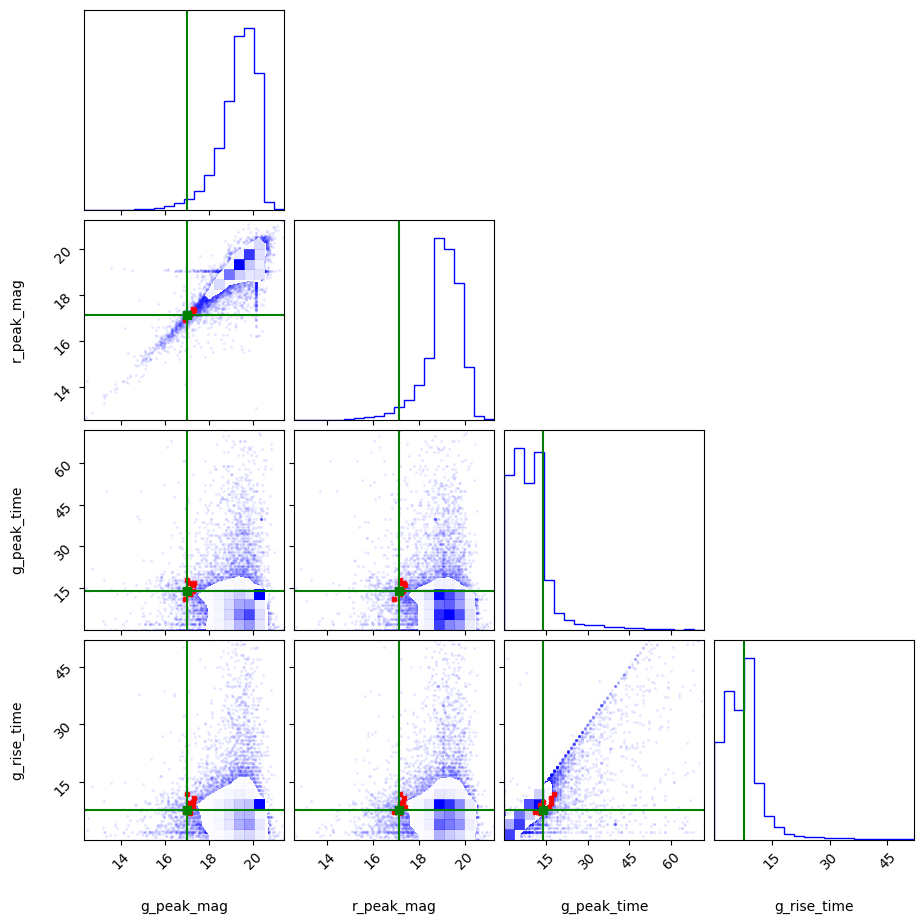

Creating corner plot for lc2...
Total number of transients for corner plot after outlier removal: 19530


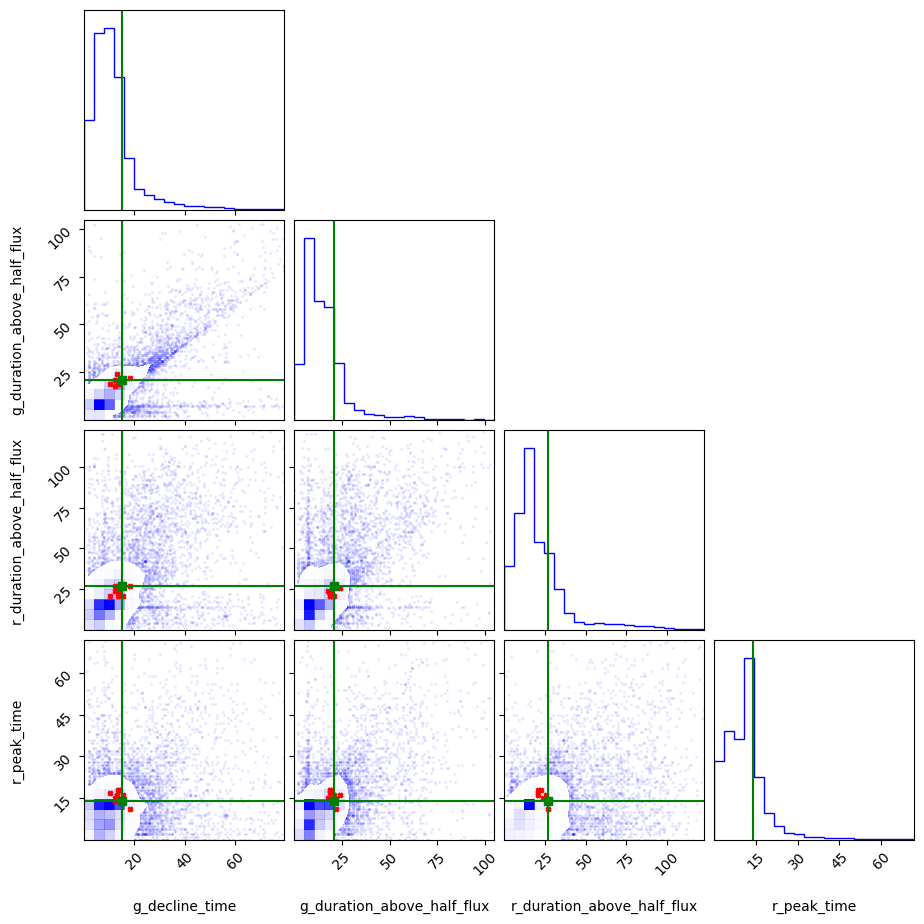

Creating corner plot for lc3...
Total number of transients for corner plot after outlier removal: 20182


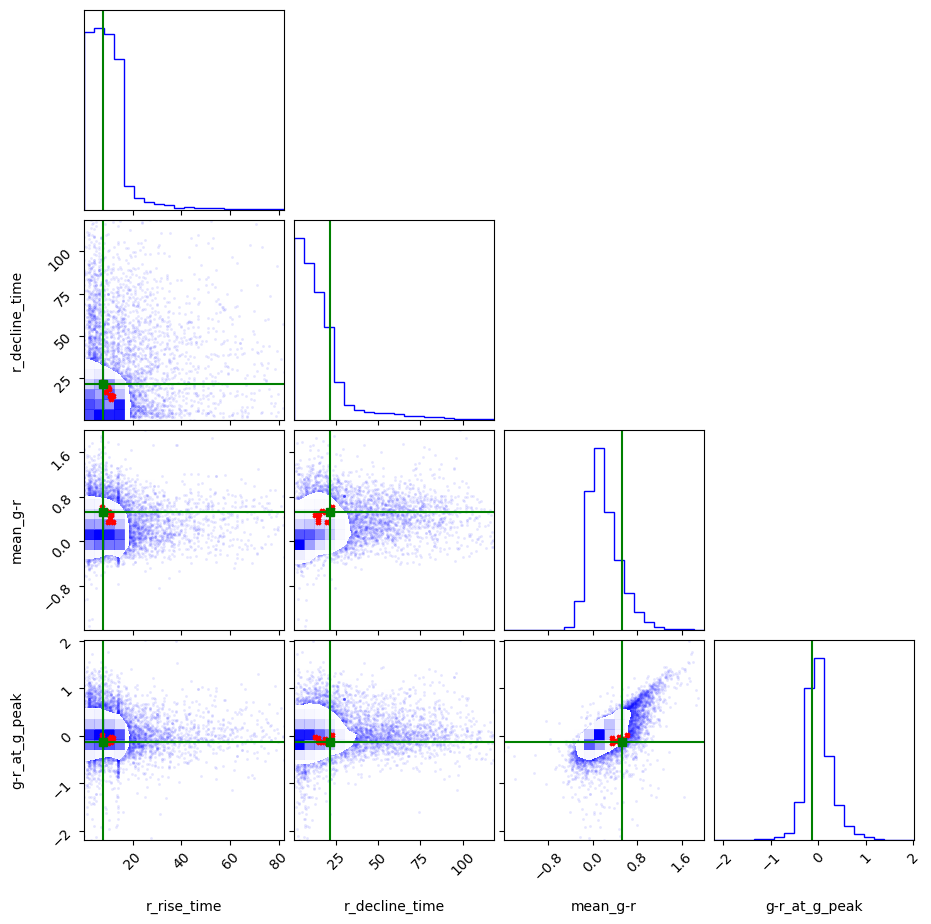

Creating corner plot for lc4...
Total number of transients for corner plot after outlier removal: 19872
Queried transient not found in dataset bank, using primer dict instead


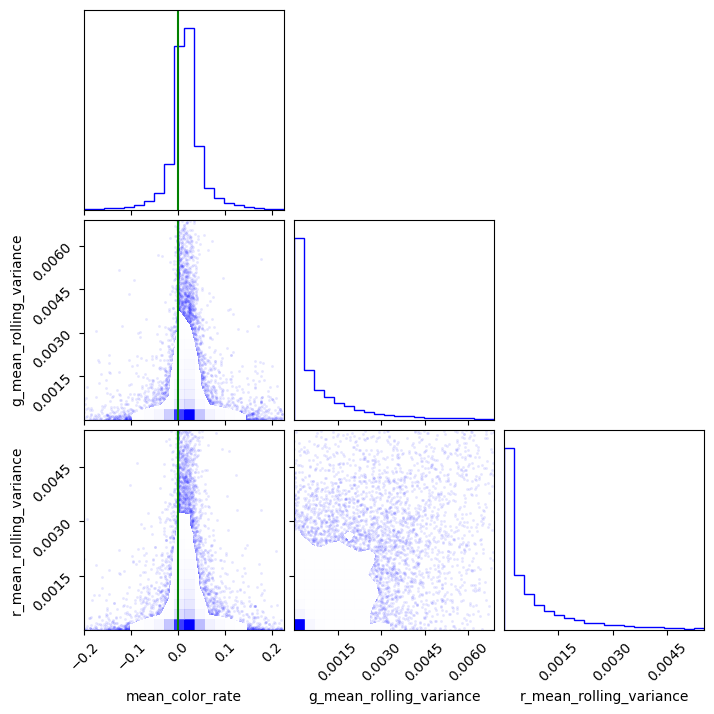

Creating corner plot for lc5...
Total number of transients for corner plot after outlier removal: 19810
Queried transient not found in dataset bank, using primer dict instead


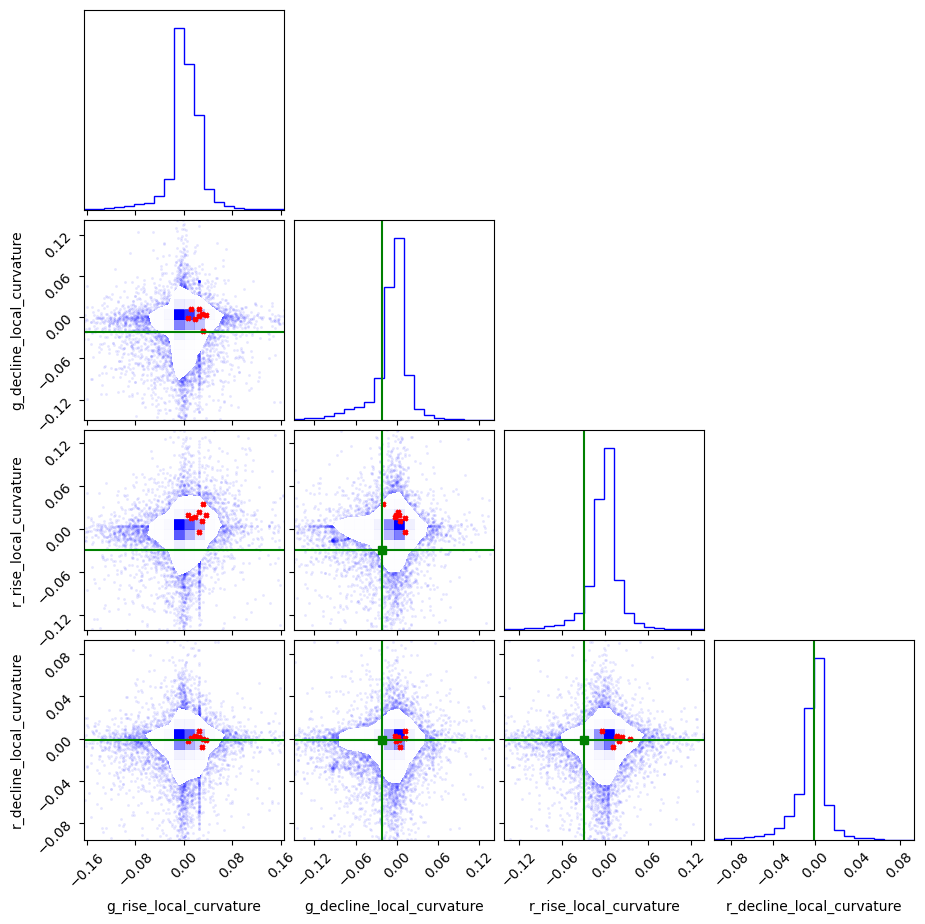

Creating corner plot for g_band...
Total number of transients for corner plot after outlier removal: 22084


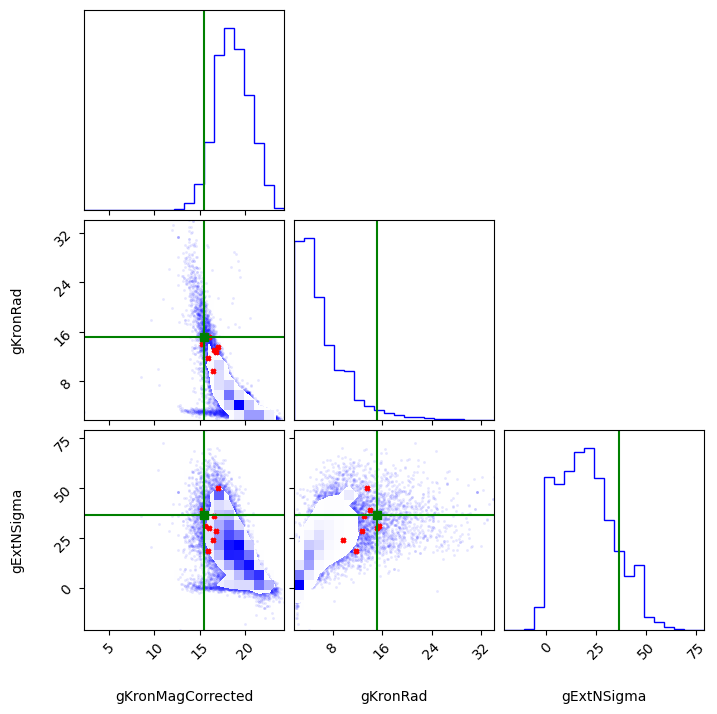

Creating corner plot for r_band...
Total number of transients for corner plot after outlier removal: 22082


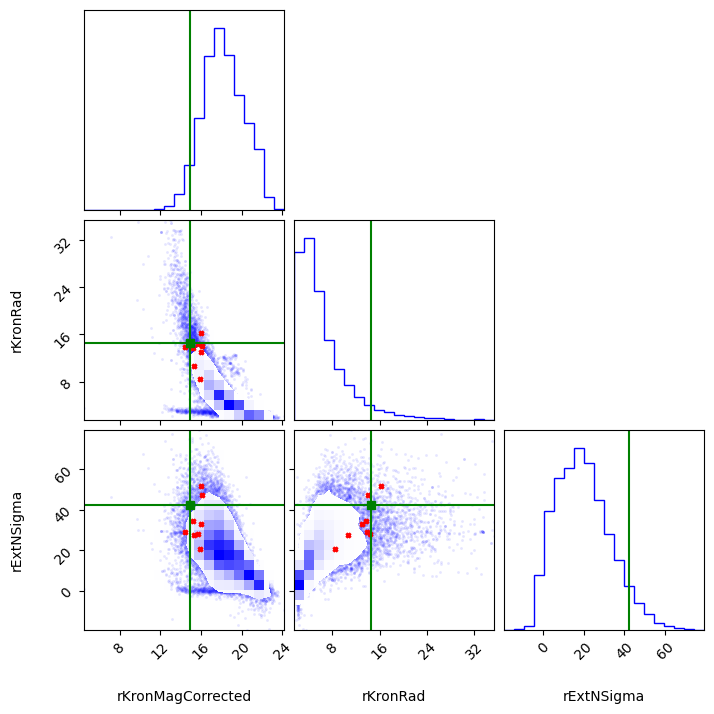

Creating corner plot for i_band...
Total number of transients for corner plot after outlier removal: 22074


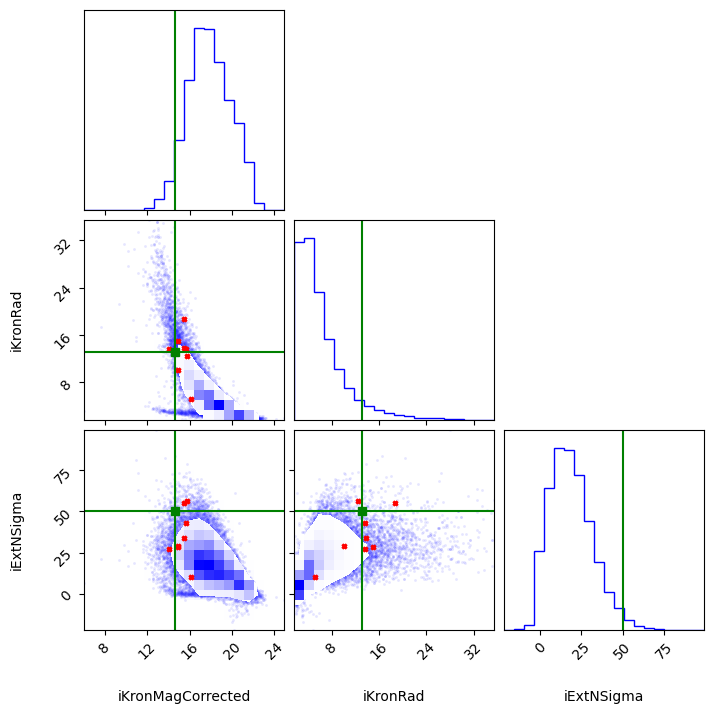

Creating corner plot for z_band...
Total number of transients for corner plot after outlier removal: 22075


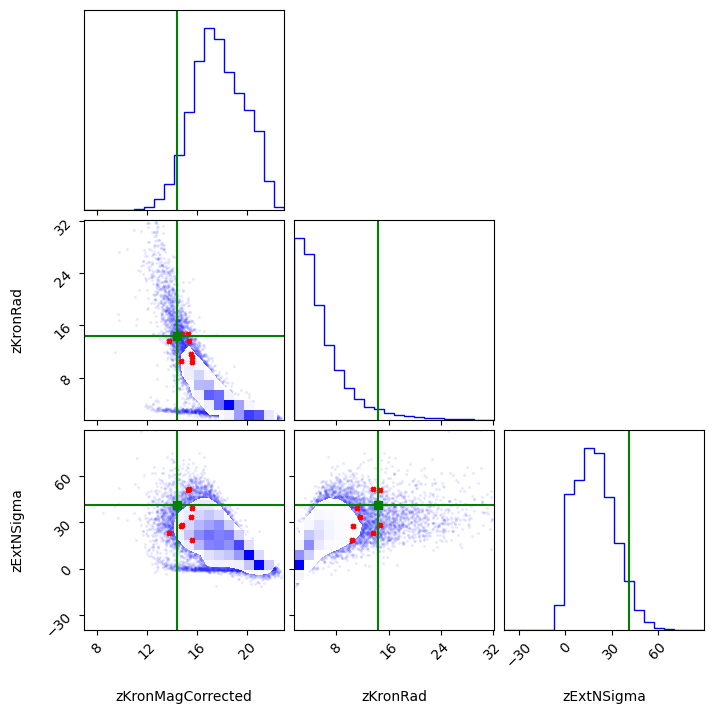

Creating corner plot for band_differences...
Total number of transients for corner plot after outlier removal: 21065


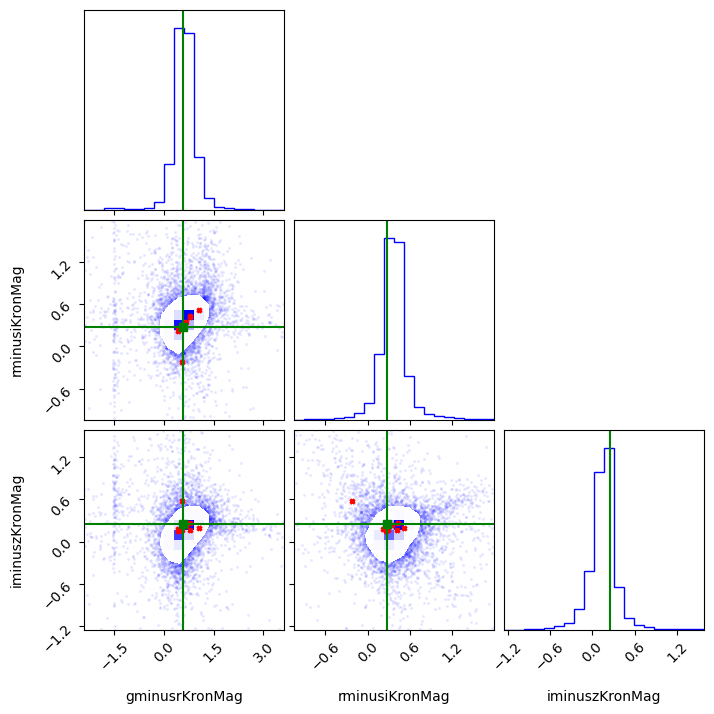

Creating corner plot for moments...
Total number of transients for corner plot after outlier removal: 22096


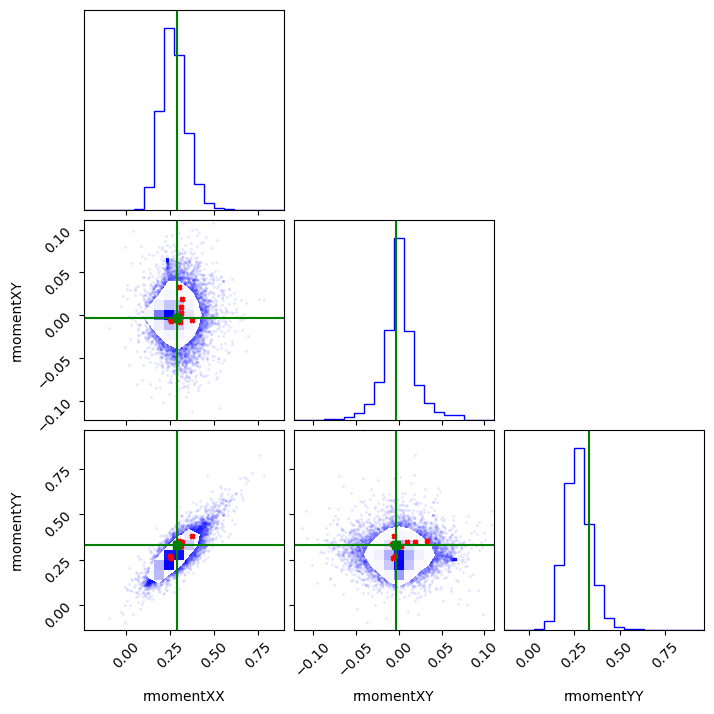

Finished creating all plots!


In [6]:
remove_outliers_bool = True

logging.getLogger().setLevel(logging.ERROR)

re_laiss_features_dict = {
    'lc1': ['g_peak_mag', 'r_peak_mag', 'g_peak_time', 'g_rise_time'],
    'lc2': ['g_decline_time', 'g_duration_above_half_flux', 'r_duration_above_half_flux', "r_peak_time"],
    'lc3': ['r_rise_time', 'r_decline_time', 'mean_g-r', 'g-r_at_g_peak'],
    'lc4': ['mean_color_rate', 'g_mean_rolling_variance', 'r_mean_rolling_variance'],
    'lc5': ['g_rise_local_curvature', 'g_decline_local_curvature', 'r_rise_local_curvature', 'r_decline_local_curvature'],
    'g_band': ['gKronMagCorrected', 'gKronRad', 'gExtNSigma'],
    'r_band': ['rKronMagCorrected', 'rKronRad', 'rExtNSigma'],
    'i_band': ['iKronMagCorrected', 'iKronRad', 'iExtNSigma'],
    'z_band': ['zKronMagCorrected', 'zKronRad', 'zExtNSigma'],
    'band_differences': ['gminusrKronMag', 'rminusiKronMag', 'iminuszKronMag'],
    'moments': ["rmomentXX", "rmomentXY", "rmomentYY"],
}

neighbor_ztfids = [link.split("/")[-1] for link in neighbors_df["ztf_link"]]

dataset_bank_df = pd.read_csv('../data/large_final_df_bank_new_lc_feats.csv')[['ztf_object_id'] + lc_feature_names + host_feature_names]
print("Total number of transients for corner plots:", dataset_bank_df.shape[0])

for batch_name, features in re_laiss_features_dict.items():
    print(f"Creating corner plot for {batch_name}...")

    # REMOVING OUTLIERS #
    def remove_outliers(df, threshold=7):
        df_clean = df.copy()
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

        for col in numeric_cols:
            col_data = df_clean[col]
            median_val = col_data.median()
            mad_val = robust.mad(col_data)  # By default uses 0.6745 scale factor internally

            # If MAD is zero, it means the column has too little variation (or all same values).
            # In that case, skip it to avoid removing all rows.
            if mad_val == 0:
                continue

            # Compute robust z-scores
            robust_z = 0.6745 * (col_data - median_val) / mad_val

            # Keep only points where the robust z-score is within the threshold
            df_clean = df_clean[abs(robust_z) <= threshold]

        return df_clean
    
    dataset_bank_df_batch_features = dataset_bank_df[['ztf_object_id'] + features]

    if remove_outliers_bool:
        dataset_bank_df_batch_features = remove_outliers(dataset_bank_df_batch_features)
        print("Total number of transients for corner plot after outlier removal:", dataset_bank_df_batch_features.shape[0])
    else:
        dataset_bank_df_batch_features = dataset_bank_df_batch_features.replace([np.inf, -np.inf, -999], np.nan).dropna()
        print("Total number of transients for corner plot after NA, inf, and -999 removal:", dataset_bank_df_batch_features.shape[0])
    # REMOVING OUTLIERS #

    neighbor_mask = dataset_bank_df_batch_features['ztf_object_id'].isin(neighbor_ztfids)
    features_df = dataset_bank_df_batch_features[features]

    # remove 'feature_' from column names
    features_df.columns = [
        col.replace("feature_", "", 1) if col.startswith("feature_") else col
        for col in features_df.columns
    ]

    neighbor_features = features_df[neighbor_mask]
    non_neighbor_features = features_df[~neighbor_mask]
    queried_features = dataset_bank_df_batch_features[dataset_bank_df_batch_features['ztf_object_id'] == queried_ztf_id].iloc[:,1:]
    try:
        queried_features_arr = queried_features.values[0]
    except:
        print("Queried transient not found in dataset bank, using primer dict instead")
        lc_feature_names = constants.lc_features_const.copy()
        host_feature_names = constants.host_features_const.copy()

        # Define columns as they are in locus feature array -> NEED TO CHANGE THIS IF JUST HOST OR JUST LIGHTCURVE
        col_order = lc_feature_names+host_feature_names

        queried_transient_feat_df = pd.DataFrame([primer_dict["locus_feat_arr"]], columns=col_order)
        queried_features_arr = queried_transient_feat_df[features].values[0]

    figure = corner.corner(non_neighbor_features, color='blue', labels=features_df.columns, plot_datapoints=True, alpha=0.3, plot_contours=False, truths=queried_features_arr, truth_color='green')
    
    # Overlay neighbor features (red) with larger, visible markers
    axes = np.array(figure.axes).reshape(len(features), len(features))
    for i in range(len(features)):
        for j in range(i):  # Only the lower triangle of the plot
            ax = axes[i, j]
            ax.scatter(
                neighbor_features.iloc[:, j], 
                neighbor_features.iloc[:, i], 
                color='red', 
                s=10,
                marker='x',
                linewidth=2
            )
    plt.show()

print("Finished creating all plots!")

## Training New AD Model

In [3]:
# ──────────────────────────── CHUNK 1 ───────────────────────────
# Train an Isolation Forest with PyOD and save it with pickle
import os
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from pyod.models.iforest import IForest

feature_names = constants.lc_features_const.copy() + constants.host_features_const.copy()

# ----------------------------- user settings -----------------------------
CSV_PATH      = "../data/large_final_df_bank_new_lc_feats.csv"
MODEL_DIR     = "../models"
FIGURE_DIR    = "../models/figures"
MODEL_NAME    = "IForest_n500_c0.02_ms1024.pkl"

# feature_names must already exist (e.g. loaded from pickle or defined in code)
# -------------------------------------------------------------------------

# Load the data and keep only the desired columns
df = pd.read_csv(CSV_PATH, low_memory=False)
X  = df[feature_names].values

# 2 Build a simple preprocessing-plus-model pipeline
pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler(with_mean=True, with_std=True)),
        ("clf", IForest(
            n_estimators = 500,
            contamination = 0.02,
            max_samples = 1024,
            behaviour = "new",
            random_state = 42,
        ))
    ]
)

# 3 Fit the model
pipe.fit(X)

# 4 Persist the pipeline
os.makedirs(MODEL_DIR,   exist_ok=True)
os.makedirs(FIGURE_DIR,  exist_ok=True)
with open(os.path.join(MODEL_DIR, MODEL_NAME), "wb") as f:
    pickle.dump(pipe, f)

print("✔︎ Isolation Forest trained and saved \n→", os.path.join(MODEL_DIR, MODEL_NAME))


✔︎ Isolation Forest trained and saved 
→ ../models/IForest_n500_c0.02_ms1024.pkl
